In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
filepath = "../data/Final Categorization Data.csv"

df = pd.read_csv(filepath).sort_values(by=['SPD_DTOT'])

df['Origin Destination Province'] = df['Origin Province'] + df['Destination Province']
df['Origin Destination Region'] = df['Origin Province'] + df['Destination Region']
df['Origin Destination New Region'] = df['Origin Province'] + df['New Regions']
df['Origin Destination Metro Area'] = df['Origin Province'] + df['Destination Metro Area']

In [27]:
X1 = df[['Quarter', 'Origin Province', 'Destination Province', 'Main Reason']]
XD = df[['DURATION']]

Y1 = df['Total Bins (20)']
y_labels = Y1.unique()

In [28]:
le = LabelEncoder()
le.fit(Y1)
Y2 = le.transform(Y1)

In [ ]:
le.classes_

In [31]:
quarter_list = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter']
province_list = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
               'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan','Alberta',
               'British Columbia', 'Yukon','Northwest Territories', 'Nunavut']
main_reason_list = ['Holiday/Leisure/Recreation', 'Friends/Relatives', 'Non-Business conference/convention/trade show',
                    'Shopping', 'School/Study', 'Medical', 'Religion', 'Other Personal',
                    'Business Meeting/Conference/Convention/Trade Show', 'Other Business']

categories = [quarter_list, province_list, province_list, main_reason_list]

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X1)
X2 = enc.transform(X1).toarray()

X3 = np.append(X2, XD.to_numpy(), axis = 1)

In [32]:


rfclss = RandomForestClassifier(max_depth=4, random_state=0)

In [33]:


kfold = KFold(n_splits=10,random_state=42,shuffle=True)

In [34]:

scores = []
y_true = []
y_pred = []
y_true_num = []
y_pred_num = []


for train_index,test_index in kfold.split(X3):
    #print("Train Index: ", train_index)
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X3[train_index], X3[test_index], Y2[train_index], Y2[test_index]
    rfclss.fit(X_train, y_train)
    y_pred_new = rfclss.predict(X_test)
    scores.append(rfclss.score(X_test, y_test))
    y_true = np.append(y_true, le.inverse_transform(y_test))
    y_true_num = np.append(y_true_num, y_test)
    y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
    y_pred_num = np.append(y_pred_num, y_pred_new)

rfclss.fit(X_train, y_train)
y_pred_new = rfclss.predict(X_test)
scores.append(rfclss.score(X_test, y_test))
y_true = np.append(y_true, le.inverse_transform(y_test))
y_true_num = np.append(y_true_num, y_test)
y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
y_pred_num = np.append(y_pred_num, y_pred_new)
print(np.mean(scores))
print(average_diff(y_true_num, y_pred_num))
cm = confusion_matrix(y_true, y_pred)
#cross_val_score(rfclss, X3, Y2, cv=10)

0.13144342662719594


In [8]:
def average_diff(array1, array2):
    totaldiff = 0
    numpoints = len(array1)
    for i in range(0, numpoints):
        diff = abs(array1[i] - array2[i])
        totaldiff += diff

    return float(totaldiff)/float(numpoints)    


In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [4]:
def rfmodel(cat_features, num_features, label, max_depth, n_splits, use_cm=False, seed=0):

    X1 = df[cat_features]
    XD = df[num_features]

    Y1 = df[label]

    le = LabelEncoder()
    le.fit(Y1)
    Y2 = le.transform(Y1)

    enc = OneHotEncoder(handle_unknown='ignore')

    enc.fit(X1)
    X2 = enc.transform(X1).toarray()

    X3 = np.append(X2, XD.to_numpy(), axis = 1)

    rfclss = RandomForestClassifier(max_depth=max_depth, random_state=seed)

    kfold = KFold(n_splits=n_splits,random_state=42,shuffle=True)

    scores = []

    y_true = []
    y_pred = []
    y_true_num = []
    y_pred_num = []


    for train_index,test_index in kfold.split(X3):
        X_train, X_test, y_train, y_test = X3[train_index], X3[test_index], Y2[train_index], Y2[test_index]
        rfclss.fit(X_train, y_train)
        y_pred_new = rfclss.predict(X_test)
        scores.append(rfclss.score(X_test, y_test))
        
        y_true = np.append(y_true, le.inverse_transform(y_test))
        y_true_num = np.append(y_true_num, y_test)
        y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
        y_pred_num = np.append(y_pred_num, y_pred_new)

    rfclss.fit(X_train, y_train)
    y_pred_new = rfclss.predict(X_test)
    scores.append(rfclss.score(X_test, y_test))
    y_true = np.append(y_true, le.inverse_transform(y_test))
    y_true_num = np.append(y_true_num, y_test)
    y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
    y_pred_num = np.append(y_pred_num, y_pred_new)
    print("Categorical Features: " + str(cat_features))
    print("Numeric Features: " + str(num_features))
    print("Label: " + label)
    print("Max Depth: " + str(max_depth))
    print("k_fold: " + str(n_splits))
    print("Mean Score: " + str(np.mean(scores)))
    print("Mean Squared Error: " + str(average_diff(y_true_num, y_pred_num)))
    print("\n")

    if (use_cm):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(include_values=False)
        plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
def knnmodel(cat_features, num_features, label, k, n_splits, use_cm=False, seed=0):

    X1 = df[cat_features]
    XD = df[num_features]

    Y1 = df[label]

    le = LabelEncoder()
    le.fit(Y1)
    Y2 = le.transform(Y1)

    enc = OneHotEncoder(handle_unknown='ignore')

    enc.fit(X1)
    X2 = enc.transform(X1).toarray()

    X3 = np.append(X2, XD.to_numpy(), axis = 1)

    knn = KNeighborsClassifier(k, p=2)

    kfold = KFold(n_splits=n_splits,random_state=42,shuffle=True)

    scores = []
    y_true = []
    y_pred = []
    y_true_num = []
    y_pred_num = []


    for train_index,test_index in kfold.split(X3):
        X_train, X_test, y_train, y_test = X3[train_index], X3[test_index], Y2[train_index], Y2[test_index]
        knn.fit(X_train, y_train)
        y_pred_new = knn.predict(X_test)
        scores.append(knn.score(X_test, y_test))
        y_true = np.append(y_true, le.inverse_transform(y_test))
        y_true_num = np.append(y_true_num, y_test)
        y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
        y_pred_num = np.append(y_pred_num, y_pred_new)

    knn.fit(X_train, y_train)
    y_pred_new = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    y_true = np.append(y_true, le.inverse_transform(y_test))
    y_true_num = np.append(y_true_num, y_test)
    y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
    y_pred_num = np.append(y_pred_num, y_pred_new)
    print("Categorical Features: " + str(cat_features))
    print("Numeric Features: " + str(num_features))
    print("Label: " + label)
    print("K-Neighbours: " + str(k))
    print("k_fold: " + str(n_splits))
    print("Mean Score: " + str(np.mean(scores)))
    print("Mean Squared Error: " + str(average_diff(y_true_num, y_pred_num)))
    print("\n")

    if (use_cm):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(include_values=False)
        plt.show()

In [47]:
from sklearn.naive_bayes import GaussianNB
def gnbmodel(cat_features, num_features, label, n_splits, use_cm=False, seed=0):

    X1 = df[cat_features]
    XD = df[num_features]

    Y1 = df[label]

    le = LabelEncoder()
    le.fit(Y1)
    Y2 = le.transform(Y1)

    enc = OneHotEncoder(handle_unknown='ignore')

    enc.fit(X1)
    X2 = enc.transform(X1).toarray()

    X3 = np.append(X2, XD.to_numpy(), axis = 1)

    gnb = GaussianNB()

    kfold = KFold(n_splits=n_splits,random_state=42,shuffle=True)

    scores = []
    y_true = []
    y_pred = []
    y_true_num = []
    y_pred_num = []


    for train_index,test_index in kfold.split(X3):
        X_train, X_test, y_train, y_test = X3[train_index], X3[test_index], Y2[train_index], Y2[test_index]
        gnb.fit(X_train, y_train)
        y_pred_new = gnb.predict(X_test)
        scores.append(gnb.score(X_test, y_test))
        y_true = np.append(y_true, le.inverse_transform(y_test))
        y_true_num = np.append(y_true_num, y_test)
        y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
        y_pred_num = np.append(y_pred_num, y_pred_new)

    gnb.fit(X_train, y_train)
    y_pred_new = gnb.predict(X_test)
    scores.append(gnb.score(X_test, y_test))
    y_true = np.append(y_true, le.inverse_transform(y_test))
    y_true_num = np.append(y_true_num, y_test)
    y_pred = np.append(y_pred, le.inverse_transform(y_pred_new))
    y_pred_num = np.append(y_pred_num, y_pred_new)
    print("Categorical Features: " + str(cat_features))
    print("Numeric Features: " + str(num_features))
    print("Label: " + label)
    print("k_fold: " + str(n_splits))
    print("Mean Score: " + str(np.mean(scores)))
    print("Mean Squared Error: " + str(average_diff(y_true_num, y_pred_num)))
    print("\n")

    if (use_cm):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(include_values=False)
        plt.show()

Categorical Features: ['Origin Province', 'Destination Region', 'Main Reason', 'Visit Friends & Family', 'Restaurant/Bar/Club', 'Shopping', 'Sightseeing', 'Museum/Art Gallery', 'Historic site', 'Zoo/Aquarium', 'Wildife Viewing/Bird Watching', 'National/Provincial/Nature Park']
Numeric Features: ['DURATION', 'GNCQ06A', 'GNCQ06B']
Label: Total Bins (20)
Max Depth: 9
k_fold: 10
Mean Score: 0.14698671255017712
Mean Squared Error: 5.495593481824318




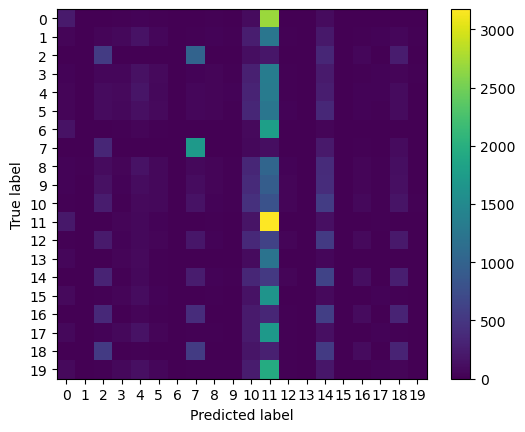

In [13]:
cat_features = ['Origin Province','Destination Region', 'Main Reason', 'Visit Friends & Family', "Restaurant/Bar/Club", 
                "Shopping", "Sightseeing", "Museum/Art Gallery", "Historic site", "Zoo/Aquarium", "Wildife Viewing/Bird Watching", "National/Provincial/Nature Park"]
num_features = ['DURATION', 'GNCQ06A', 'GNCQ06B']
labels = ['Total Bins (20)']
max_depth = 9
k=3
n_splits = 10

for label in labels:
    rfmodel(cat_features, num_features, label, max_depth, n_splits, True, seed=1)
    #knnmodel(cat_features, num_features, label, k, n_splits, seed=1)
    #gnbmodel(cat_features, num_features, label, n_splits, seed=1)